In [3]:
import numpy as np 
import pandas as pd 
import keras
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix



In [4]:
datatest = pd.read_csv("D:/datatest.txt")
datatest2 = pd.read_csv("D:/datatest2.txt")
datatraining = pd.read_csv("D:/datatraining.txt")

In [5]:
print(datatest.info())
datatest.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [6]:
print(datatest2.info())
datatest2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [7]:
print(datatraining.info())
datatraining.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [8]:
datatest['date'] = pd.to_datetime(datatest['date'])
datatest2['date'] = pd.to_datetime(datatest2['date'])
datatraining['date'] = pd.to_datetime(datatraining['date'])
datatest.reset_index(drop=True, inplace=True)
datatest2.reset_index(drop=True, inplace=True)
datatraining.reset_index(drop=True, inplace=True)

In [9]:
datatraining.describe()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,2015-02-07 13:41:59.688812544,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
min,2015-02-04 17:51:00,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,2015-02-06 03:46:30,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,2015-02-07 13:41:59,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,2015-02-08 23:37:30,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,2015-02-10 09:33:00,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000
std,NaN,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982


In [10]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(datatraining[columns]))
datatest[columns] = scaler.transform(np.array(datatest[columns]))
datatest2[columns] = scaler.transform(np.array(datatest2[columns]))
datatraining[columns] = scaler.transform(np.array(datatraining[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


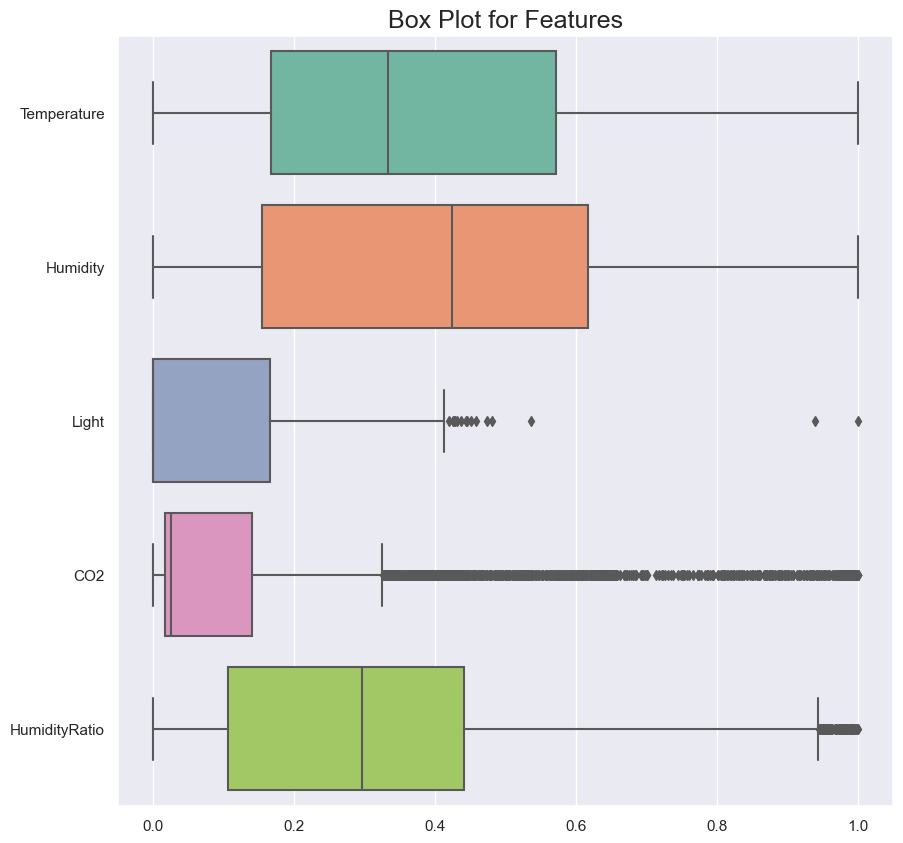

In [11]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=datatraining.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(datatraining.drop(['date', 'Occupancy'],axis=1).describe())

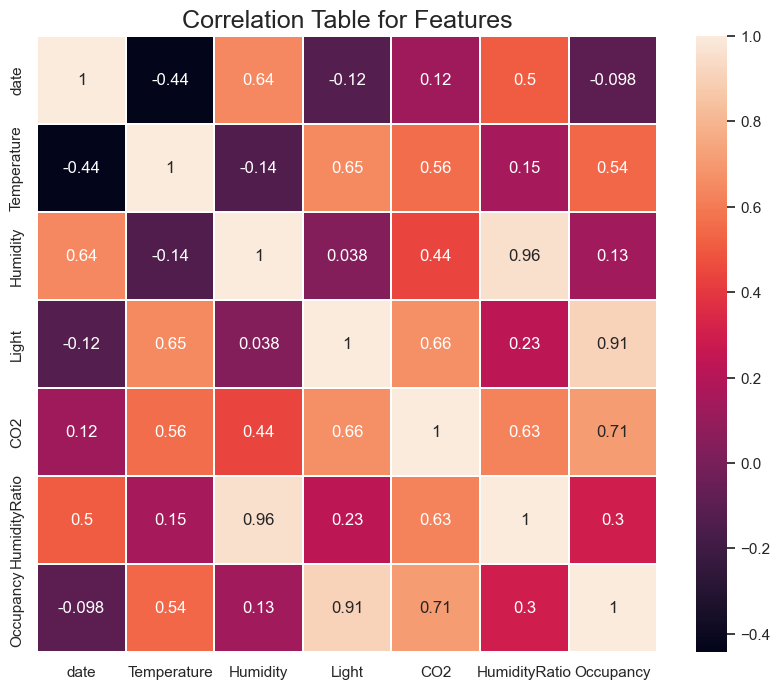

In [12]:
plt.figure(figsize=(10,8))
plt.title('Correlation Table for Features', fontdict={'fontsize':18})
ax = sns.heatmap(datatraining.corr(), annot=True, linewidths=.2)

In [13]:
data = datatraining.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy",
                                                'y':0.9,
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

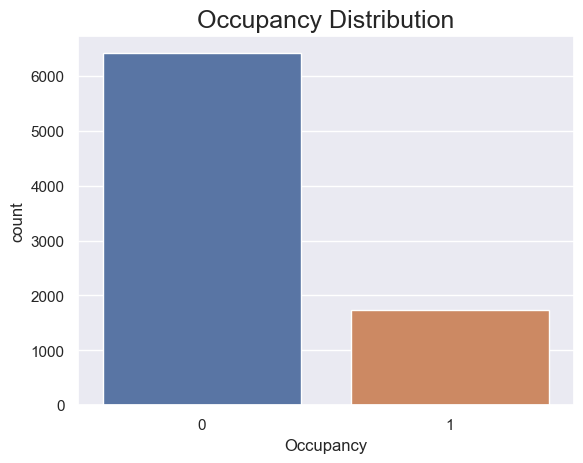

In [14]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=datatraining)

In [15]:
hours_1 = []
hours_0 = []
for date in datatraining[datatraining['Occupancy'] == 1]['date']:
    hours_1.append(date.hour)
for date in datatraining[datatraining['Occupancy'] == 0]['date']:
    hours_0.append(date.hour)

C:\Users\Gaming123awesome\AppData\Local\Temp\ipykernel_4028\2800830631.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Gaming123awesome\AppData\Local\Temp\ipykernel_4028\2800830631.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




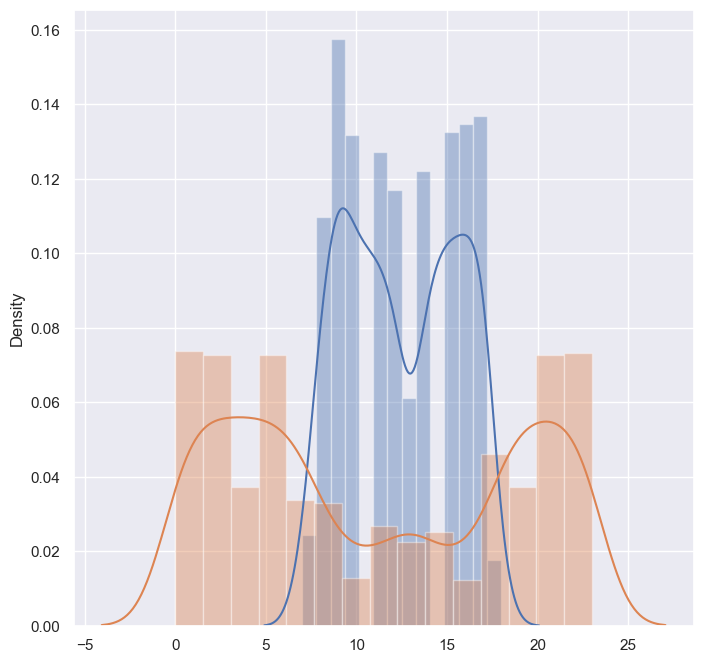

In [16]:
plt.figure(figsize=(8,8))
ax = sns.distplot(hours_1)
ax = sns.distplot(hours_0)

In [17]:
datatest['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest['date']]
datatest2['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatest2['date']]
datatraining['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in datatraining['date']]
datatraining.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,period_of_day
6518,2015-02-09 06:29:00,0.093301,0.426640,0.000000,0.032647,0.258096,0,0
8071,2015-02-10 08:22:00,0.308612,0.735501,0.000000,0.022848,0.583042,0,1
1378,2015-02-05 16:49:00,0.805024,0.434797,0.289071,0.411419,0.460672,1,1
385,2015-02-05 00:16:00,0.547847,0.377919,0.000000,0.026768,0.333498,0,0
6620,2015-02-09 08:10:59,0.119617,0.440496,0.000000,0.036051,0.276221,0,1
6902,2015-02-09 12:53:00,0.598086,0.754572,0.322699,0.556965,0.701268,1,1
1574,2015-02-05 20:05:00,0.526316,0.118226,0.000000,0.046882,0.088871,0,0
5348,2015-02-08 10:59:00,0.058612,0.617052,0.012772,0.012378,0.404835,0,1
5746,2015-02-08 17:37:00,0.093301,0.467315,0.009054,0.005725,0.291579,0,1
2733,2015-02-06 15:23:59,0.741627,0.218497,0.317310,0.317035,0.231357,1,1


In [18]:
X_train = datatraining.drop(columns=['date', 'Occupancy'], axis=1)
y_train = datatraining['Occupancy']
X_validation = datatest.drop(columns=['date', 'Occupancy'], axis=1)
y_validation = datatest['Occupancy']
X_test = datatest2.drop(columns=['date', 'Occupancy'], axis=1)
y_test = datatest2['Occupancy']

In [19]:
# parameter-tuning for knn
n_neighbors_list = [7,15,45,135]
weights_list = ['uniform', 'distance']
metric_list = ['euclidean', 'manhattan']
accuracies = {}
for n in n_neighbors_list:
    for weight in weights_list:
        for metric in metric_list:
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric)
            knn_model.fit(X_train, y_train)
            accuracy = knn_model.score(X_validation, y_validation)
            accuracies[str(n)+"/"+weight+"/"+metric] = accuracy

In [20]:
plotdata = pd.DataFrame()
plotdata['Parameters'] = accuracies.keys()
plotdata['Accuracy'] = accuracies.values()
fig = px.line(plotdata, x="Parameters", y="Accuracy")
fig.update_layout(title={'text': "Accuracies for Different Hyper-Parameters",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

[[1616   77]
 [  20  952]]
0.9636022514071294
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1693
           1       0.93      0.98      0.95       972

    accuracy                           0.96      2665
   macro avg       0.96      0.97      0.96      2665
weighted avg       0.96      0.96      0.96      2665

0.9515242378810594
0.9251700680272109
0.9794238683127572


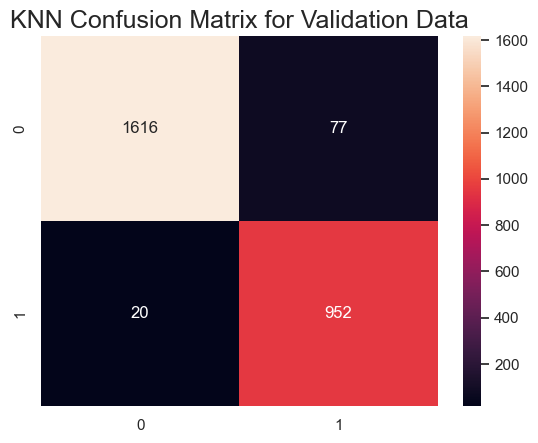

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=135)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_validation)
plt.title("KNN Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")
print(confusion_matrix(y_validation, y_pred))
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score
print(accuracy_score(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(f1_score(y_validation, y_pred))
print(precision_score(y_validation, y_pred))
print(recall_score(y_validation, y_pred))

In [22]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("Accuracy for SVM on validation data: {}%".format(round((svm_model.score(X_validation, y_validation)*100),2)))

Accuracy for SVM on validation data: 97.82%


[[1637   56]
 [   2  970]]
0.9782363977485928
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1693
           1       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

0.970970970970971
0.9454191033138402
0.9979423868312757


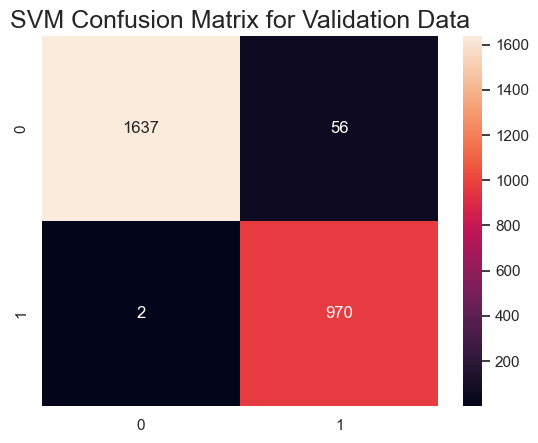

In [23]:
y_pred = svm_model.predict(X_validation)
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_validation, y_pred), annot=True, fmt="d")
print(confusion_matrix(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(f1_score(y_validation, y_pred))
print(precision_score(y_validation, y_pred))
print(recall_score(y_validation, y_pred))

In [24]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l2, l1
from keras.metrics import BinaryAccuracy

In [25]:
# NN without regularization
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=6))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50


C:\Users\Gaming123awesome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7523 - loss: 0.5516 - val_accuracy: 0.9452 - val_loss: 0.1840
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.9699 - loss: 0.1303 - val_accuracy: 0.9486 - val_loss: 0.1123
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.9788 - loss: 0.0708 - val_accuracy: 0.9704 - val_loss: 0.0868
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.9848 - loss: 0.0626 - val_accuracy: 0.9760 - val_loss: 0.0790
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9860 - loss: 0.0578 - val_accuracy: 0.9767 - val_loss: 0.0762
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.9861 - loss: 0.0511 - val_accuracy: 0.9782 - val_loss: 0.0730
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.9874 - loss: 0.0476 - val_accuracy: 0.9782 - val_loss: 0.0726
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9901 - loss: 0.0446 - val_accuracy:

Epoch 1/50


C:\Users\Gaming123awesome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8120 - loss: 0.4934 - val_accuracy: 0.9490 - val_loss: 0.1650
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.9592 - loss: 0.1320 - val_accuracy: 0.9629 - val_loss: 0.0995
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.9741 - loss: 0.0813 - val_accuracy: 0.9692 - val_loss: 0.0904
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.9796 - loss: 0.0671 - val_accuracy: 0.9715 - val_loss: 0.0854
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.9836 - loss: 0.0546 - val_accuracy: 0.9722 - val_loss: 0.0823
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9877 - loss: 0.0519 - val_accuracy: 0.9764 - val_loss: 0.0806
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9838 - loss: 0.0552 - val_accuracy: 0.9764 - val_loss: 0.0809
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.9859 - loss: 0.0574 - val_accuracy:

In [29]:
# NN with L1(Lasso) regularization
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l1(l1=0.01)))
model3.add(Dense(16, activation='relu', kernel_regularizer=l1(l1=0.01)))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50


C:\Users\Gaming123awesome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7409 - loss: 1.4893 - val_accuracy: 0.8773 - val_loss: 0.6602
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9242 - loss: 0.5212 - val_accuracy: 0.9193 - val_loss: 0.4029
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.9571 - loss: 0.3633 - val_accuracy: 0.9385 - val_loss: 0.3318
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.9646 - loss: 0.3121 - val_accuracy: 0.9306 - val_loss: 0.3109
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.9688 - loss: 0.2813 - val_accuracy: 0.9460 - val_loss: 0.2801
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.9720 - loss: 0.2624 - val_accuracy: 0.9531 - val_loss: 0.2581
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9756 - loss: 0.2406 - val_accuracy: 0.9508 - val_loss: 0.2460
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.9731 - loss: 0.2268 - val_accuracy:

In [30]:
# NN with L2(Ridge) Regularization
model4 = Sequential()
model4.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(l2=0.01)))
model4.add(Dense(16, activation='relu', kernel_regularizer=l2(l2=0.01)))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/50


C:\Users\Gaming123awesome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7889 - loss: 0.7834 - val_accuracy: 0.9024 - val_loss: 0.3947
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.9493 - loss: 0.3113 - val_accuracy: 0.9396 - val_loss: 0.2471
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.9640 - loss: 0.2219 - val_accuracy: 0.9463 - val_loss: 0.2139
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.9714 - loss: 0.1943 - val_accuracy: 0.9471 - val_loss: 0.1982
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.9738 - loss: 0.1777 - val_accuracy: 0.9482 - val_loss: 0.1890
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.9728 - loss: 0.1715 - val_accuracy: 0.9501 - val_loss: 0.1786
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9789 - loss: 0.1566 - val_accuracy: 0.9576 - val_loss: 0.1680
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.9773 - loss: 0.1487 - val_accuracy:

In [31]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']


fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss without Regularization', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss without Regularization', line = dict(color='firebrick')))

fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss with Dropout', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss with Dropout', line = dict(color='firebrick', dash='dash')))

fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss with L1 Regularization', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss with L1 Regularization', line = dict(color='firebrick', dash='dot')))

fig.add_trace(go.Scatter(x=np.arange(len(loss4)), y=loss4,
                    name='Training Loss with L2 Regularization', line=dict(color='royalblue', dash='longdashdot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss4)), y=val_loss4,
                    name='Validation Loss with L2 Regularization', line = dict(color='firebrick', dash='longdashdot')))


fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

In [33]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=6, kernel_regularizer=l2(l2=0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2=0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


C:\Users\Gaming123awesome\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.8187 - loss: 0.7769
Epoch 2/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9458 - loss: 0.2964
Epoch 3/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9593 - loss: 0.2178
Epoch 4/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9650 - loss: 0.1893
Epoch 5/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9749 - loss: 0.1654
Epoch 6/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9733 - loss: 0.1623
Epoch 7/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9761 - loss: 0.1474
Epoch 8/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.9814 - loss: 0.1389
Epoch 9/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9820 - loss: 0.1345
Epoch 10/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9828 - loss: 0.1309
Epoch 11/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9846 - loss: 0.1196
Epoch 12/50
255/255 ━━━━━━━━━━━━━━━━━━━━ 

In [34]:
print("Accuracy for SVM on test data: {}%\n".format(round((svm_model.score(X_test, y_test)*100),2)))
print("Accuracy for Neural Network model on test data: {}%".format(round((model.evaluate(X_test, y_test)[1]*100),2)))

Accuracy for SVM on test data: 98.38%

305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.9810 - loss: 0.1102
Accuracy for Neural Network model on test data: 98.97%


0.9837981952420016
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7703
           1       0.93      1.00      0.96      2049

    accuracy                           0.98      9752
   macro avg       0.97      0.99      0.98      9752
weighted avg       0.98      0.98      0.98      9752

0.9627182633317602
0.9319323892188214
0.9956076134699854


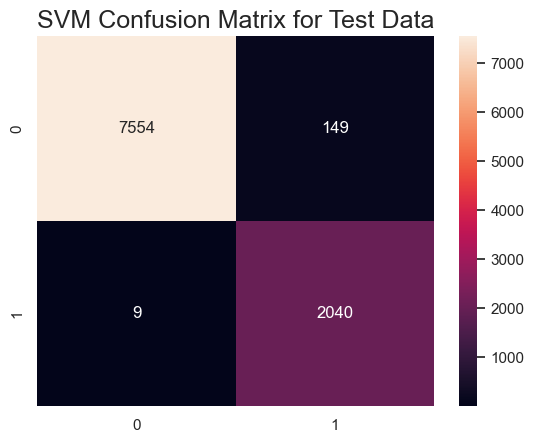

In [37]:
y_pred = svm_model.predict(X_test)
plt.title("SVM Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
0.9868744872846595
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.98      0.96      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752

0.9685503685503686
0.975259772389906
0.9619326500732065


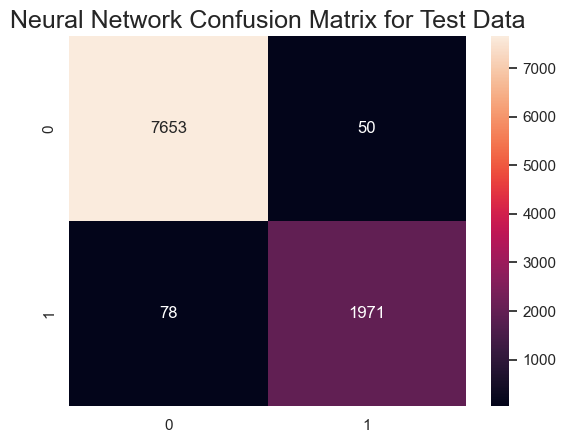

In [38]:
y_pred = model.predict(X_test)
threshold = 0.6
y_pred = [1 if i >= threshold else 0 for i in y_pred]
plt.title("Neural Network Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))